In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

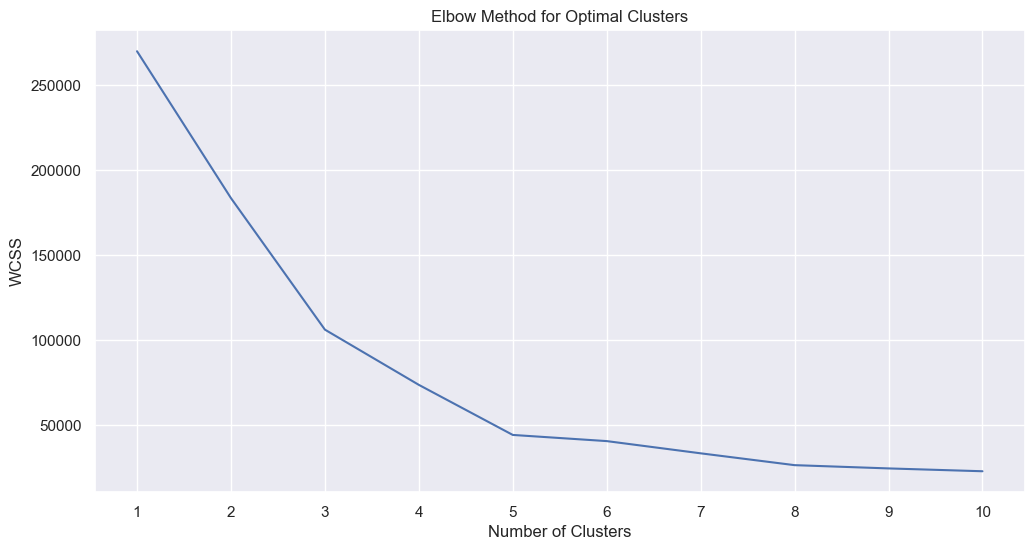

In [12]:
# Initialize DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Create X variable
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Within Clusters Sum of Squares variable
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    # Append inertia to wcss
    wcss.append(kmeans.inertia_)
    
# Check for optimum number of clusters using elbow plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=wcss)
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1, 11, 1))
plt.show()

# K-Means Clustering

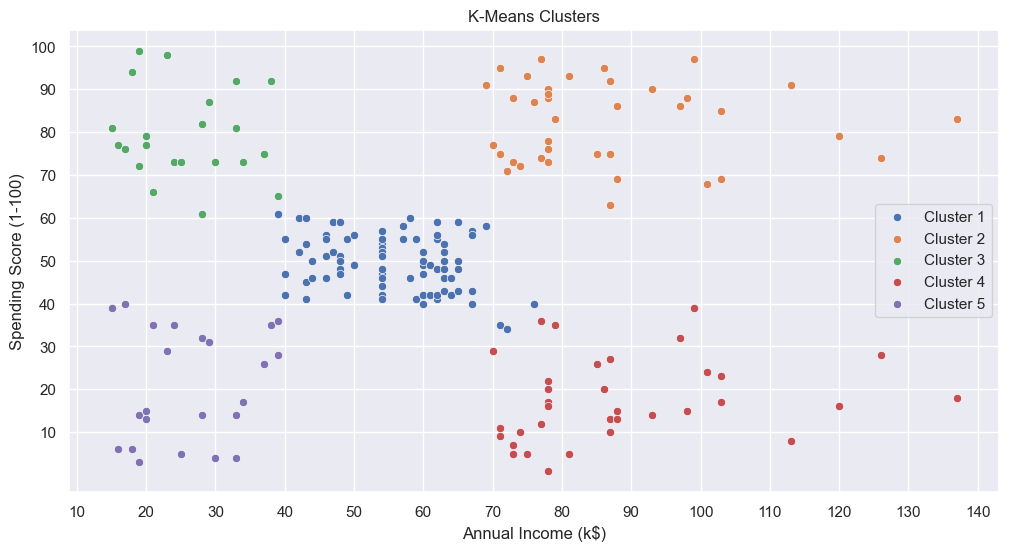

In [26]:
# Create model
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans_model.fit(X)

# Predict clusters
kmeans_pred = kmeans_model.predict(X)

# Visualize K-Means Clusters
plt.figure(figsize=(12, 6))
for cluster in range(5):
    # Create cluster
    cluster_data = X[kmeans_pred == cluster]
    # Plot cluster
    sns.scatterplot(x=cluster_data[:, 0], y=cluster_data[:, 1], label=f"Cluster {cluster+1}")
plt.title("K-Means Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.xticks(np.arange(10, 141, 10))
plt.yticks(np.arange(10, 101, 10))
plt.show()